# Project Numerical Analysis: 'Beams and Frameworks of Beams'

### Dependencies

In [1]:
from meshes import *
from get_S import get_extended_q_vector, get_extended_S

from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
import numpy as np

### Generate Mesh

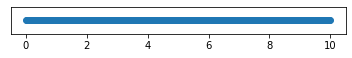

In [2]:
# Spatial resolution of mesh
N = 200

# Right limit of mesh
L = 10

# Generate 1D mesh
[nodes, elems, faces] = get_mesh_1D(N, [0,L], True);
elems = np.array(elems)[:-1,:]          # I believe there is one row too much in elems from get_mesh function

In [30]:
# Define some parameters, E, I, and q can also be lambda functions 
E = 1
I = 1
q = lambda x: x-4

# boundary conditions
QL = 0
M0 = 0
ML = 0
a  = 0
b  = 0
a0 = 0
aL = 0

# choose whether the beam is supported at both ends or only at the left end
two_sided_support = True


if two_sided_support:
    boundary_conditions = {'M0': M0, 'ML': ML, 'a0': a0, 'aL': aL}
else:
    boundary_conditions = {'QL': QL, 'ML': ML, 'a': a, 'b': b}

In [31]:
S_ext = get_extended_S(nodes, elems, E, I, two_sided_support)
rhs = get_extended_q_vector(nodes, elems, q, boundary_conditions, two_sided_support)    

C:\Users\Carsten\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [32]:
solution = spsolve(S_ext, rhs)
w = solution[:-2]
Q0 = solution[-2]
QL = solution[-1]

In [33]:
with np.printoptions(precision=3, suppress=True):
    print(S_ext.toarray())

[[ 94567.188  47283.594 -94567.188 ...      0.         1.         0.   ]
 [ 47283.594  31522.396 -47283.594 ...      0.         0.         0.   ]
 [-94567.188 -47283.594 189134.376 ...      0.         0.         0.   ]
 ...
 [     0.         0.         0.    ...  31522.396      0.         0.   ]
 [     1.         0.         0.    ...      0.         0.         0.   ]
 [     0.         0.         0.    ...      0.         0.         0.   ]]


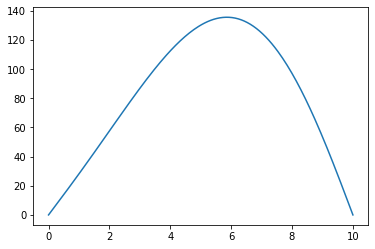

In [34]:
#plot solution from odd w values
plt.plot(nodes,w[::2])

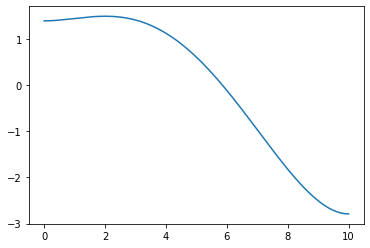

In [35]:
#plot derivative from even w values
plt.plot(nodes,w[1::2])